## LSTM Auto-encoder on MNIST data

In [2]:
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from keras import regularizers

import warnings
warnings.filterwarnings("ignore")

In [3]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

2022-02-25 19:58:28.876460: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-25 19:58:28.877353: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 19:58:28.877529: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-02-25 19:58:28.877691: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-02-25 19:58:28.877874: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [4]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [5]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Visualize the model architecture

In [7]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


For the following code to work (in linux):

In python:

- pip install pydot
- pip install pydotplus

In the terminal:
- sudo apt-get install graphviz

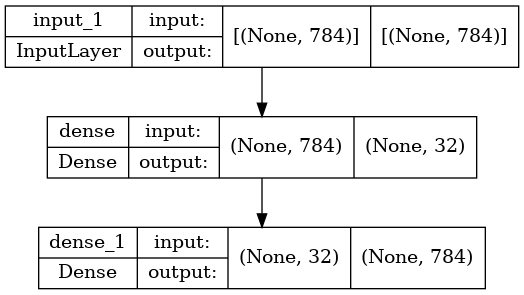

In [9]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(autoencoder, to_file=dot_img_file, show_shapes=True)

### Prepare your data (MNIST dataset)

In [12]:

(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

In [14]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Now let's train our autoencoder for 50 epochs

In [15]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50


2022-02-25 19:24:19.163044: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-02-25 19:24:19.278623: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


235/235 [==============================] - 4s 12ms/step - loss: 0.2791 - val_loss: 0.1920
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1720 - val_loss: 0.1542
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1446 - val_loss: 0.1339
Epoch 4/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1284 - val_loss: 0.1209
Epoch 5/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1181 - val_loss: 0.1126
Epoch 6/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1110 - val_loss: 0.1071
Epoch 7/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1061 - val_loss: 0.1027
Epoch 8/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1024 - val_loss: 0.0996
Epoch 9/50
235/235 [==============================] - 5s 22ms/step - loss: 0.0997 - val_loss: 0.0974
Epoch 10/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0978 - val_loss: 0.0958


### visualize the reconstructed inputs and the encoded representations. 

In [16]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

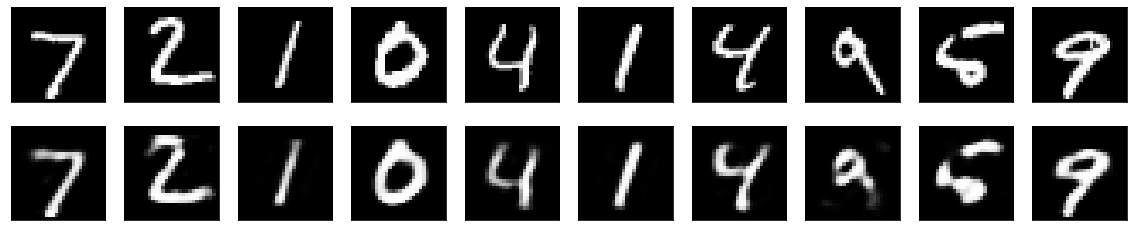

In [17]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Adding a sparsity constraint on the encoded representations


In [ ]:
encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()